In [6]:
import re
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# ***Lyrics Embeddings***

In [7]:
raw_data = pd.read_csv('dataset/raw_final_music_data_with_lyrics.csv')
raw_data.head()

,title,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,...,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01,lyrics
0,Food,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,...,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,"I remember I had walked home that day, content..."
1,Electric Ave,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,...,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330,"Oi\nOi\n\nNow in the street, there is violence..."
2,This World,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,...,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,"Сколько было всего\nСкоко дыма, токо бы не вид..."
3,Freeway,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,...,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,"Man if I get rocked, this shit for my kids, ni..."
4,Spiritual Level,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,...,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993,I've prepared myself for anyone in my life to ...


In [8]:
raw_data.iloc[2]['lyrics']

'Сколько было всего\nСкоко дыма, токо бы не видеть мира сего\nИ скоко вынесено\nОни говорили: «Сынок, ты не от мира сего»\nСколько было всего\nНо токо всё мимо, помимо стихов из мира сего\nВсе вроде выросли, но так и не смылось клеймо\nТы не от мира сего\n\nНе от мира сего, лишний, как чернила с пером\nКак будто кто-то вырыл зерно или вынул звено\nИз цепи, где каждый образцово-показательный — ссать на них\nС этим миром связь проходит строго по касательной\nПока ссадины ныли, грел песчаный карьер\nИ с кем бы ни общался сейчас, ощущаешь барьер\nИ ты вроде вполне здоров, но роясь в себе подробно\nВсё проводишь бесплодный поиск себе подобных\nГде бездумные, бездомные, потёртые\nОбдолбанные Колфилды, дёрганые Дёрдены?\nАнгедония, приметы Джареда Лето\nМы — дети амфетамина, Бафомета и ню-металла\nТы — такой, и не примет стая\nМы Питеры Пэны из пены дней — мы растём, но не вырастаем\nБредя по одноколейке\nМикроавтобус уходит в микрорайон — видно, Бог играет в модельки\n\nСколько было всего\nС

In [9]:
nlp = spacy.load('en_core_web_sm')
vectorizer = TfidfVectorizer(smooth_idf=True)

In [10]:
def modify_lyrics(lyrics):
    # Remove text within square brackets
    lyrics = re.sub(r'\[.*?\]', '', lyrics)
    # Convert to lowercase
    lyrics = lyrics.lower()
    # Remove extra whitespace
    lyrics = re.sub(r'\s+', ' ', lyrics).strip()
    # Lemmatization and stopword removal
    doc = nlp(lyrics)
    lyrics = ' '.join([token.text for token in doc if not token.is_stop and not token.is_punct])
    return lyrics

def vectorize_lyrics(lyrics):
    vectorizer.fit_transform(lyrics)
    return vectorizer.transform(lyrics).toarray()

In [11]:
raw_data['lyrics'] = raw_data.lyrics.apply(modify_lyrics)

In [12]:
raw_data['embedded_lyrics'] = list(vectorize_lyrics(raw_data['lyrics']))

In [13]:
vectorizer.vocabulary_

{'remember': 27794,
 'walked': 36366,
 'home': 15734,
 'day': 8410,
 'content': 7206,
 'misery': 21370,
 'told': 34009,
 'better': 3546,
 'clue': 6414,
 'people': 24690,
 'walkin': 36369,
 'talkin': 33087,
 'distance': 9590,
 'dressed': 10028,
 'winter': 36881,
 'weather': 36560,
 'summer': 32470,
 'rays': 27309,
 'kissin': 18286,
 'lost': 19745,
 'took': 34064,
 'different': 9236,
 'path': 24420,
 'awaited': 2665,
 'weapon': 36551,
 'guessin': 14708,
 'hands': 15038,
 'question': 26916,
 'laughed': 18954,
 'sight': 30458,
 'presence': 26009,
 'alarming': 1311,
 'approached': 1970,
 'casual': 5401,
 'talked': 33084,
 'bout': 4254,
 'self': 29756,
 'harmin': 15115,
 'kid': 18182,
 'smiled': 30928,
 'pat': 24404,
 'asked': 2250,
 'far': 12165,
 'said': 29053,
 'maybe': 20694,
 'thirty': 33645,
 'minutes': 21317,
 'frequency': 13274,
 'distorted': 9611,
 'quick': 26931,
 'seen': 29703,
 'image': 16361,
 'run': 28813,
 'right': 28378,
 'fuckin': 13407,
 'woke': 36972,
 'train': 34267,
 'tr

In [14]:
# save the vectorizer
import joblib
joblib.dump(vectorizer, 'models/tfidf_vectorizer.pkl')

['models/tfidf_vectorizer.pkl']

In [15]:
raw_data.iloc[0]['embedded_lyrics']
np.where(raw_data.iloc[2]['embedded_lyrics']>0)[0].shape

(188,)

In [16]:
vectorizer.get_feature_names_out()[np.where(raw_data.iloc[2]['embedded_lyrics']>0)[0]]

array(['deck', 'dj', 'payback', 'tape', 'амфетамина', 'ангедония',
       'барьер', 'бафомета', 'бездомные', 'бездумные', 'бесплодный',
       'блаженные', 'блядь', 'бог', 'бредя', 'будто', 'бы', 'было',
       'веет', 'видеть', 'видно', 'вижу', 'витязи', 'вполне', 'вроде',
       'все', 'всего', 'вспорот', 'всё', 'вынесено', 'вынул', 'вырастаем',
       'выросли', 'вырыл', 'где', 'говорили', 'город', 'графоманы',
       'грел', 'делятся', 'дети', 'дешёвой', 'джареда', 'дивный', 'дней',
       'дуй', 'дыма', 'дёрганые', 'дёрдены', 'жалует', 'жизнью',
       'забвением', 'забытые', 'зарождается', 'звено', 'здоров', 'зерно',
       'играет', 'из', 'или', 'инфантилен', 'истина', 'каждый', 'кажись',
       'как', 'какой', 'карьер', 'касательной', 'кем', 'клеймо', 'книги',
       'колфилды', 'конце', 'кругом', 'кто', 'лени', 'лень', 'лето',
       'лишний', 'лотреамон', 'любишь', 'меломаны', 'металла',
       'микроавтобус', 'микрорайон', 'мимо', 'мир', 'мира', 'миром',
       'мишель', 'ми

In [17]:
featured_data = raw_data.drop(columns=['lyrics'])

In [18]:
featured_data.head()

,title,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,...,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01,embedded_lyrics
0,Food,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,...,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Electric Ave,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,...,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,This World,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,...,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Freeway,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,...,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Spiritual Level,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,...,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# ***Feature Engg On Audio Data***

In [19]:
import seaborn as sns


In [20]:
mean_feats_in_audio = [feat for feat in featured_data.columns if 'mean' in feat]
kurtosis_feats_in_audio = [feat for feat in featured_data.columns if 'kurtosis' in feat]

zcr_mean_01                 zcr_mean_01                   1.000000
spectral_rolloff_mean_01    spectral_centroid_mean_01     0.980385
chroma_cqt_mean_01          chroma_cens_mean_01           0.932312
chroma_cqt_mean_03          chroma_cens_mean_03           0.932105
chroma_cens_mean_05         chroma_cqt_mean_05            0.929202
chroma_cqt_mean_10          chroma_cens_mean_10           0.927698
chroma_cens_mean_08         chroma_cqt_mean_08            0.916319
spectral_bandwidth_mean_01  spectral_rolloff_mean_01      0.914609
chroma_cqt_mean_12          chroma_cens_mean_12           0.904109
chroma_cqt_mean_02          chroma_cens_mean_02           0.904083
chroma_cqt_mean_07          chroma_cens_mean_07           0.900338
chroma_cens_mean_11         chroma_cqt_mean_11            0.900336
chroma_cqt_mean_06          chroma_cens_mean_06           0.899294
spectral_contrast_mean_03   spectral_contrast_mean_04     0.890463
chroma_cens_mean_09         chroma_cqt_mean_09            0.88

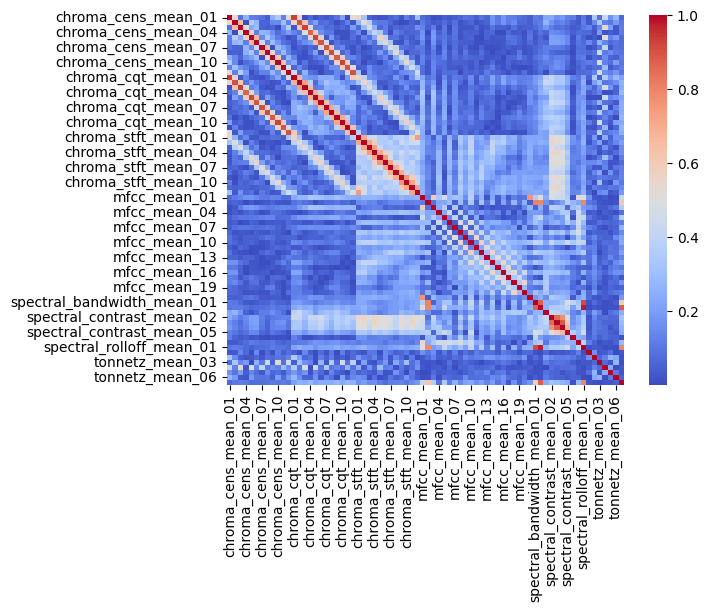

In [21]:
mean_corr_mat = featured_data[mean_feats_in_audio].corr().abs()
sns.heatmap(mean_corr_mat, cmap='coolwarm')
mean_corr_mat.stack().sort_values(ascending=False).drop_duplicates().head(20)

zcr_kurtosis_01               zcr_kurtosis_01                  1.000000
chroma_cens_kurtosis_11       chroma_cens_kurtosis_08          0.978917
chroma_cqt_kurtosis_11        chroma_cens_kurtosis_11          0.974011
chroma_cens_kurtosis_08       chroma_cens_kurtosis_06          0.969311
chroma_cqt_kurtosis_08        chroma_cqt_kurtosis_09           0.967048
chroma_cens_kurtosis_06       chroma_cens_kurtosis_11          0.965305
chroma_cens_kurtosis_08       chroma_cqt_kurtosis_06           0.963419
chroma_cens_kurtosis_05       chroma_cens_kurtosis_06          0.963102
chroma_cqt_kurtosis_06        chroma_cens_kurtosis_06          0.959396
                              chroma_cens_kurtosis_11          0.958964
chroma_cens_kurtosis_11       chroma_cens_kurtosis_05          0.953442
chroma_cqt_kurtosis_11        chroma_cqt_kurtosis_06           0.953372
                              chroma_cens_kurtosis_08          0.949082
chroma_cens_kurtosis_08       chroma_cens_kurtosis_05          0

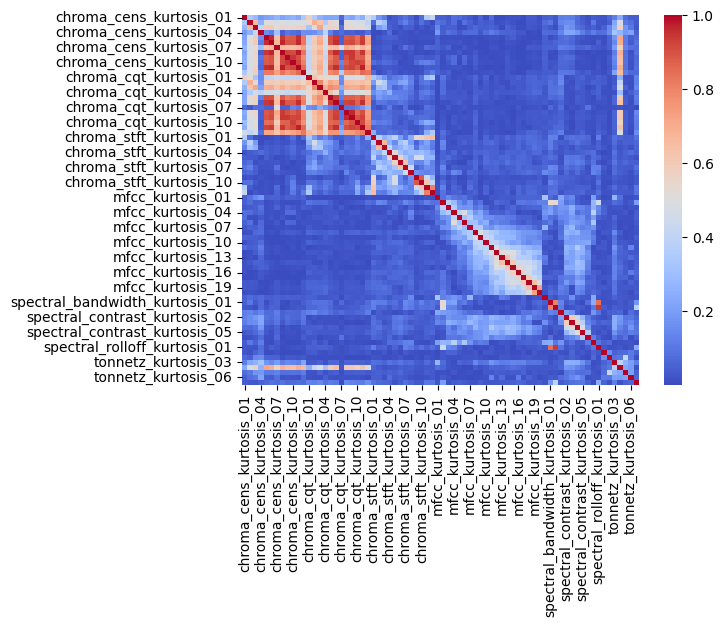

In [22]:
kurtosis_corr_mat = featured_data[kurtosis_feats_in_audio].corr().abs()
sns.heatmap(kurtosis_corr_mat, cmap='coolwarm')
kurtosis_corr_mat.stack().sort_values(ascending=False).drop_duplicates().head(20)

- bandwidth, rolloff, centroid are highly corellated -> removing rolloff and bandwidth
- cens, stft, cens highly corellated -> droping cens and stft

In [23]:
columns_cens = [col for col in featured_data.columns if 'cens' in col]
columns_cstft = [col for col in featured_data.columns if 'stft' in col]
columns_sband = [col for col in featured_data.columns if 'bandwidth' in col]
columns_srolloff = [col for col in featured_data.columns if 'rolloff' in col]
featured_data_ = featured_data.drop(columns=columns_cens+columns_cstft+columns_sband+columns_srolloff)

In [24]:
featured_data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Columns: 339 entries, title to embedded_lyrics
dtypes: float64(336), int64(1), object(2)
memory usage: 4.5+ MB


In [25]:
featured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Columns: 521 entries, title to embedded_lyrics
dtypes: float64(518), int64(1), object(2)
memory usage: 7.0+ MB


In [26]:
featured_data_.head()

,title,track_id,chroma_cqt_kurtosis_01,chroma_cqt_kurtosis_02,chroma_cqt_kurtosis_03,chroma_cqt_kurtosis_04,chroma_cqt_kurtosis_05,chroma_cqt_kurtosis_06,chroma_cqt_kurtosis_07,chroma_cqt_kurtosis_08,...,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01,embedded_lyrics
0,Food,2,4.518084,0.223714,-1.098686,-0.781633,-0.938433,-1.132679,-0.909878,-0.496936,...,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Electric Ave,3,-0.855436,-0.883988,-0.992211,-0.675419,-0.361638,-0.927972,0.094254,0.944722,...,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,This World,5,-0.605479,-1.181325,-0.663084,-0.390240,-0.436532,-0.658291,-1.038576,-1.353048,...,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Freeway,10,0.162342,-0.751456,-0.088175,-0.790742,-0.416584,0.101062,1.617054,-0.556345,...,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Spiritual Level,20,-0.864132,-1.228160,-1.183112,-0.168118,-0.266643,-0.688895,-1.085411,-1.369968,...,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# ***Audio Embedding Single Vector***

In [27]:
audio_embeddings = featured_data_.loc[:, 'chroma_cqt_kurtosis_01' : 'zcr_std_01'].values
audio_embeddings

array([[ 4.51808357e+00,  2.23713920e-01, -1.09868646e+00, ...,
         0.00000000e+00,  2.08987212e+00,  6.14481084e-02],
       [-8.55435669e-01, -8.83988142e-01, -9.92211223e-01, ...,
         0.00000000e+00,  1.71672380e+00,  6.93301633e-02],
       [-6.05479181e-01, -1.18132484e+00, -6.63084090e-01, ...,
         0.00000000e+00,  2.19330311e+00,  4.48606014e-02],
       ...,
       [-5.72548568e-01, -6.21063173e-01, -9.45896864e-01, ...,
         3.41796875e-03,  1.94468629e+00,  5.43908402e-02],
       [ 4.84632105e-01, -4.88834292e-01, -8.72374356e-01, ...,
         5.85937500e-03,  3.76358986e+00,  3.42239961e-02],
       [-1.26142991e+00, -1.02461386e+00, -9.72051501e-01, ...,
         4.39453125e-03,  2.68346000e+00,  4.73919585e-02]],
      shape=(1749, 336))

In [28]:
# scaling audio vector
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_audio_embeddings = scaler.fit_transform(audio_embeddings)

In [29]:
# clean up
featured_data_ = featured_data_.drop(columns=featured_data_.loc[:, 'chroma_cqt_kurtosis_01' : 'zcr_std_01'].columns)
featured_data_['embedded_audio'] = list(scaled_audio_embeddings)  
featured_data_.head()

,title,track_id,embedded_lyrics,embedded_audio
0,Food,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.785089702565878, 0.18288326792595785, -0.38..."
1,Electric Ave,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2463047684734232, -0.29120481275638305, -0..."
2,This World,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.15181171725085515, -0.4184626640978929, -0..."
3,Freeway,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.13845395022998827, -0.23448204521914165, 0...."
4,Spiritual Level,20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.24959237461982178, -0.4385078186758335, -0..."


In [30]:
joblib.dump(scaler, 'models/audio_feature_scaler.pkl')

['models/audio_feature_scaler.pkl']

# ***Final Dataset With Net Song Embedding***

In [31]:
embedded_audio = featured_data_['embedded_audio']
embedded_lyrics = featured_data_['embedded_lyrics']
net_embeddings = np.array([np.concatenate((0.6 * a, 0.4 *b)) for a,b in zip(embedded_audio, embedded_lyrics)])
net_embeddings

array([[ 1.07105382,  0.10972996, -0.23072438, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14778286, -0.17472289, -0.19954655, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09108703, -0.2510776 , -0.10317229, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08361762, -0.10720495, -0.18598488, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15617506, -0.07324918, -0.16445619, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23987161, -0.21083493, -0.19364343, ...,  0.        ,
         0.        ,  0.        ]], shape=(1749, 45332))

In [32]:
featured_data_['song_embedding'] = list(net_embeddings)

In [33]:
featured_data_ = featured_data_.drop(columns=['embedded_audio', 'embedded_lyrics'])

In [34]:
featured_data_.loc[0, 'song_embedding']

array([ 1.07105382,  0.10972996, -0.23072438, ...,  0.        ,
        0.        ,  0.        ], shape=(45332,))

# ***Train Test Split***

In [35]:
data = featured_data_
data.head()

,title,track_id,song_embedding
0,Food,2,"[1.0710538215395269, 0.10972996075557472, -0.2..."
1,Electric Ave,3,"[-0.14778286108405392, -0.17472288765382982, -..."
2,This World,5,"[-0.09108703035051309, -0.25107759845873573, -..."
3,Freeway,10,"[0.08307237013799296, -0.140689227131485, 0.06..."
4,Spiritual Level,20,"[-0.14975542477189308, -0.26310469120550006, -..."


In [36]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
train_data.shape, test_data.shape

((1574, 3), (175, 3))

In [37]:
train_data['song_embedding'].values[0]

array([-0.19267101, -0.28993842, -0.15171675, ...,  0.        ,
        0.        ,  0.        ], shape=(45332,))

# ***Cosine Similarity***

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
def recc_top_k (train_data, target_song, k):
    # get all song embeddings in 2D array
    all_song_embeddings = np.vstack(train_data.loc[:, 'song_embedding'].values)

    scores = cosine_similarity(all_song_embeddings, [target_song]).flatten()
    idx = np.argsort(scores)[:k]

    songs = train_data.loc[idx, 'title']
    return songs

In [40]:
recc_top_k(train_data, test_data['song_embedding'].values[1], 5)

937                Babies
343         The Screamers
802                Garden
101            Blah intro
1384    Money Money Money
Name: title, dtype: object

# ***KMeans Clustering***

In [41]:
from sklearn.cluster import KMeans

In [ ]:
# best k determination using elbow method
inertia = []
K = range(1, 25)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(np.vstack(train_data.loc[:, 'song_embedding'].values))
    inertia.append(kmeans.inertia_)
inertia

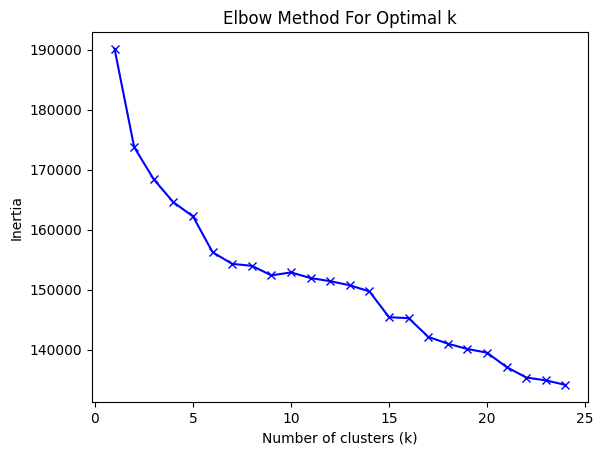

In [ ]:
# elbow visualization
import matplotlib.pyplot as plt
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

- Viewing the elbow graph it can be assumed that `15` is the best k

In [ ]:
final_kmeans = KMeans(n_clusters=15, random_state=42)
km_model = final_kmeans.fit(np.vstack(train_data.loc[:, 'song_embedding'].values))

In [ ]:
# adding the cluster labels to the featured data
featured_data_['cluster'] = km_model.predict(np.vstack(featured_data_.loc[:, 'song_embedding'].values))

In [ ]:
featured_data_.head()

,title,track_id,song_embedding,cluster
0,Food,2,"[1.0710538215395269, 0.10972996075557472, -0.2...",11
1,Electric Ave,3,"[-0.14778286108405392, -0.17472288765382982, -...",3
2,This World,5,"[-0.09108703035051309, -0.25107759845873573, -...",3
3,Freeway,10,"[0.08307237013799296, -0.140689227131485, 0.06...",3
4,Spiritual Level,20,"[-0.14975542477189308, -0.26310469120550006, -...",9


In [ ]:
# save the model and data with clusters
# import joblib
# joblib.dump(km_model, 'models/kmeans_model.pkl')

['models/kmeans_model.pkl']

In [ ]:
# featured_data_.to_feather("dataset/featured_data_with_clusters.feather")